In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [3]:
import pandas as pd

In [4]:
data=pd.read_csv('BCPdata.csv')

In [6]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

      ...       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0     ...               17.33           184.60      2019.0            0.1622   
1     ...               23.41           158.80      1956.0            0.1238   
2     ...               25.53           152.50      1709.0            0.1444   
3     ...               26.50            98.87       567.7            0.2098   
4     ...               16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [9]:
data.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

        ...       texture_worst  perimeter_worst  area_worst  \
564     ...               26.40           166.10      2027.0   
565     ...               38.25           155.00      1731.0   
566     ...               34.12           126.70      1124.0   
567     ...               39.42           184.60      1821.0   
568     ...               30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  \
564                0.2216          0.2060                  0.07115   
565                0.1628          0.2572                  0.06637   
566                0.1418          0.2218                  0.07820   
567                0.2650          0.4087                  0.12400   
568                0.0000          0.2871                  0.07039   

     Unnamed: 32  
564          NaN  
565          NaN  
566          NaN  
567          NaN  
568          NaN  

[5 rows x 33 columns]

In [11]:
data.drop('id',axis=1,inplace=True)
data.drop('Unnamed: 32',axis=1,inplace=True)
len(data)

569

In [13]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [15]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean           ...             radius_worst  texture_worst  \
0         0.2419           ...                    25.38          17.33   
1         0.1812           ...                    24.99          23.41   
2         0.2069           ...                    23.57          25.53   
3         0.2597           ...                    14.91          26.50   
4         0.1809           ...                    22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 31 columns]

In [16]:
data.tail()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean           ...             radius_worst  texture_worst  \
564         0.1726           ...                   25.450          26.40   
565         0.1752           ...                   23.690          38.25   
566         0.1590           ...                   18.980          34.12   
567         0.2397           ...                   25.740          39.42   
568         0.1587           ...                    9.456          30.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     concavity_worst  concave points_worst  symmetry_worst  \
564           0.4107                0.2216          0.2060   
565           0.3215                0.1628          0.2572   
566           0.3403                0.1418          0.2218   
567           0.9387                0.2650          0.4087   
568           0.0000                0.0000          0.2871   

     fractal_dimension_worst  
564                  0.07115  
565                  0.06637  
566                  0.07820  
567                  0.12400  
568                  0.07039  

[5 rows x 31 columns]

In [17]:
data.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean           ...             radius_worst  texture_worst  \
count     569.000000           ...               569.000000     569.000000   
mean        0.181162           ...                16.269190      25.677223   
std         0.027414           ...                 4.833242       6.146258   
min         0.106000           ...                 7.930000      12.020000   
25%         0.161900           ...                13.010000      21.080000   
50%         0.179200           ...                14.970000      25.410000   
75%         0.195700           ...                18.790000      29.720000   
max         0.304000           ...                36.040000      49.540000   

       perimeter_worst   area_worst  smoothness_worst  compactness_worst  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       concavity_worst  concave points_worst  symmetry_worst  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       fractal_dimension_worst  
count               569.000000  
mean                  0.083946  
std                   0.018061  
min                   0.055040  
25%                   0.071460  
50%                   0.080040  
75%                   0.092080  
max                   0.207500  

[8 rows x 31 columns]

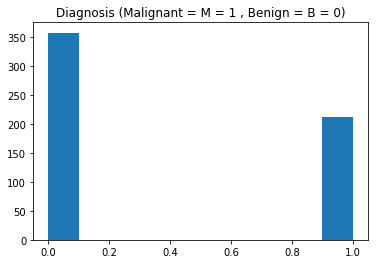

In [19]:
data.describe()
plt.hist(data['diagnosis'])
plt.title('Diagnosis (Malignant = M = 1 , Benign = B = 0)')
plt.show()

In [24]:
features_mean=list(data.columns[1:11])
dataM=data[data['diagnosis'] ==1]
dataB=data[data['diagnosis'] ==0]

In [25]:
dataM

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
5            1        12.45         15.70           82.57      477.1   
6            1        18.25         19.98          119.60     1040.0   
7            1        13.71         20.83           90.20      577.9   
8            1        13.00         21.82           87.50      519.8   
9            1        12.46         24.04           83.97      475.9   
10           1        16.02         23.24          102.70      797.8   
11           1        15.78         17.89          103.60      781.0   
12           1        19.17         24.80          132.40     1123.0   
13           1        15.85         23.95          103.70      782.7   
14           1        13.73         22.61           93.60      578.3   
15           1        14.54         27.54           96.73      658.8   
16           1        14.68         20.13           94.74      684.5   
17           1        16.13         20.68          108.10      798.8   
18           1        19.81         22.15          130.00     1260.0   
22           1        15.34         14.26          102.50      704.4   
23           1        21.16         23.04          137.20     1404.0   
24           1        16.65         21.38          110.00      904.6   
25           1        17.14         16.40          116.00      912.7   
26           1        14.58         21.53           97.41      644.8   
27           1        18.61         20.25          122.10     1094.0   
28           1        15.30         25.27          102.40      732.4   
29           1        17.57         15.05          115.00      955.1   
30           1        18.63         25.11          124.80     1088.0   
31           1        11.84         18.70           77.93      440.6   
32           1        17.02         23.98          112.80      899.3   
..         ...          ...           ...             ...        ...   
444          1        18.03         16.85          117.50      990.0   
446          1        17.75         28.03          117.30      981.6   
449          1        21.10         20.52          138.10     1384.0   
451          1        19.59         25.00          127.70     1191.0   
460          1        17.08         27.15          111.20      930.9   
461          1        27.42         26.27          186.90     2501.0   
468          1        17.60         23.33          119.00      980.5   
479          1        16.25         19.51          109.80      815.8   
487          1        19.44         18.82          128.10     1167.0   
489          1        16.69         20.20          107.10      857.6   
492          1        18.01         20.56          118.40     1007.0   
498          1        18.49         17.52          121.30     1068.0   
499          1        20.59         21.24          137.80     1320.0   
501          1        13.82         24.49           92.33      595.9   
503          1        23.09         19.83          152.10     1682.0   
509          1        15.46         23.95          103.80      731.3   
512          1        13.40         20.52           88.64      556.7   
514          1        15.05         19.07           97.26      701.9   
516          1        18.31         20.58          120.80     1052.0   
517          1        19.89         20.26          130.50     1214.0   
521          1        24.63         21.60          165.50     1841.0   
533          1        20.47         20.67          134.70     1299.0   
535          1        20.55         20.86          137.80     1308.0   
536          1        14.27         22.55    

In [26]:
dataB

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
19           0       13.540         14.36           87.46      566.3   
20           0       13.080         15.71           85.63      520.0   
21           0        9.504         12.44           60.34      273.9   
37           0       13.030         18.42           82.61      523.8   
46           0        8.196         16.84           51.71      201.9   
48           0       12.050         14.63           78.04      449.3   
49           0       13.490         22.30           86.91      561.0   
50           0       11.760         21.60           74.72      427.9   
51           0       13.640         16.34           87.21      571.8   
52           0       11.940         18.24           75.71      437.6   
55           0       11.520         18.75           73.34      409.0   
58           0       13.050         19.31           82.61      527.2   
59           0        8.618         11.79           54.34      224.5   
60           0       10.170         14.88           64.55      311.9   
61           0        8.598         20.98           54.66      221.8   
63           0        9.173         13.86           59.20      260.9   
66           0        9.465         21.01           60.11      269.4   
67           0       11.310         19.04           71.80      394.1   
68           0        9.029         17.33           58.79      250.5   
69           0       12.780         16.49           81.37      502.5   
71           0        8.888         14.64           58.79      244.0   
74           0       12.310         16.52           79.19      470.9   
76           0       13.530         10.94           87.91      559.2   
79           0       12.860         18.00           83.19      506.3   
80           0       11.450         20.97           73.81      401.5   
81           0       13.340         15.86           86.49      520.0   
84           0       12.000         15.65           76.95      443.3   
88           0       12.360         21.80           79.78      466.1   
89           0       14.640         15.24           95.77      651.9   
90           0       14.620         24.02           94.57      662.7   
..         ...          ...           ...             ...        ...   
530          0       11.750         17.56           75.89      422.9   
531          0       11.670         20.02           75.21      416.2   
532          0       13.680         16.33           87.76      575.5   
534          0       10.960         17.62           70.79      365.6   
537          0       11.690         24.44           76.37      406.4   
538          0        7.729         25.49           47.98      178.8   
539          0        7.691         25.44           48.34      170.4   
540          0       11.540         14.44           74.65      402.9   
541          0       14.470         24.99           95.81      656.4   
542          0       14.740         25.42           94.70      668.6   
543          0       13.210         28.06           84.88      538.4   
544          0       13.870         20.70           89.77      584.8   
545          0       13.620         23.23           87.19      573.2   
546          0       10.320         16.35           65.31      324.9   
547          0       10.260         16.58           65.85      320.8   
548          0        9.683         19.34           61.05      285.7   
549          0       10.820         24.21           68.89      361.6   
550          0       10.860         21.48           68.51      360.5   
551          0       11.130         22.44           71.49      378.4   
552          0       12.770         29.43           81.35      507.9   
553          0        9.333         21.94           59.01      264.0   
554          0       12.880         28.92           82.50      514.3   
555          0       10.290         27.61           65.67      321.4   
556          0       10.160         19.59    

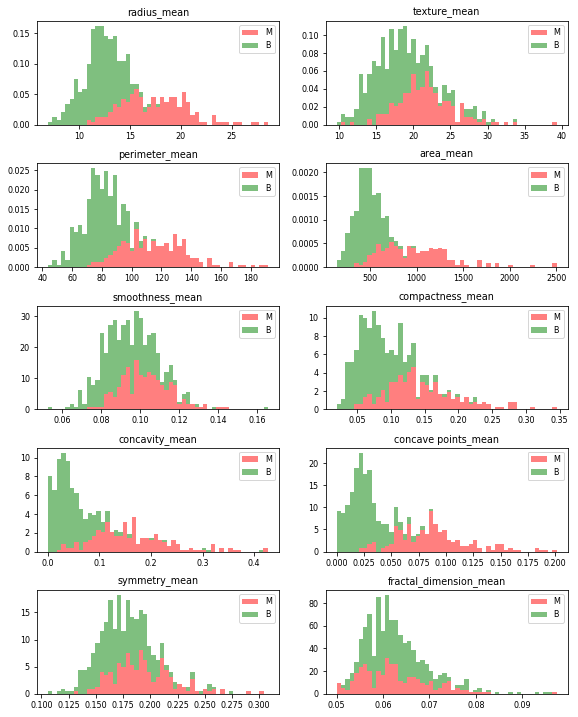

In [37]:
#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data[features_mean[idx]]) - min(data[features_mean[idx]]))/50
    ax.hist([dataM[features_mean[idx]],dataB[features_mean[idx]]], bins=np.arange(min(data[features_mean[idx]]), max(data[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, normed = True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()


# Observations

1. mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.
2. mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other. In any of the histograms there are no noticeable large outliers that warrants further cleanup.

# Creating a test set and a training set

Since this data set is not ordered, I am going to do a simple 70:30 split to create a training data set and a test data set.



In [38]:
traindata, testdata = train_test_split(data, test_size = 0.3)


# Model Classification

Here we are going to build a classification model and evaluate its performance using the training set.


In [39]:
#Generic function for making a classification model and accessing the performance. 
# From AnalyticsVidhya tutorial
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 


# Logistic Regression model
Logistic regression examines the relationship between a binary outcome (dependent) variable such as presence or absence of disease and predictor (explanatory or independent) variables such as patient demographics. We used logistic   regression model as a classifier to  predict  the  outcome  of  biopsy  in breast cancer.The training and    validation samples were used to  build  and  validate the logistic  regression  model,  respectively. Briefly,the  logistic  regression analysis was a statistical technique through which to examine the between a dependent variable (result of  biopsy) and a set of independent  variables radiological   features). Then the independent variables,    which    could provide the best prediction,will be selected.This  approach is commonly applied to predict membership in two groups  using a set of predictors.
Logistic regression is widely used for classification of discrete data. In this case we will use it for binary (1,0) classification.

Based on the observations in the histogram plots, we can reasonably hypothesize that the cancer diagnosis depends on the mean cell radius, mean perimeter, mean area, mean compactness, mean concavity and mean concave points. We can then perform a logistic regression analysis using those features as follows:


In [40]:
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
outcome_var='diagnosis'
model=LogisticRegression()
classification_model(model,traindata,predictor_var,outcome_var)

Accuracy : 88.693%
Cross-Validation Score : 91.250%
Cross-Validation Score : 90.000%
Cross-Validation Score : 90.000%
Cross-Validation Score : 89.019%
Cross-Validation Score : 88.430%


The prediction accuracy is reasonable. What happens if we use just one predictor? Use the mean_radius:

In [41]:
predictor_var = ['radius_mean']
model=LogisticRegression()
classification_model(model,traindata,predictor_var,outcome_var)

Accuracy : 88.191%
Cross-Validation Score : 86.250%
Cross-Validation Score : 87.500%
Cross-Validation Score : 89.583%
Cross-Validation Score : 88.074%
Cross-Validation Score : 87.168%




This gives a similar prediction accuracy and a cross-validation score.

The accuracy of the predictions are good but not great. The cross-validation scores are reasonable. 
Let try with another model.
# Decision Tree Model


In [42]:
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
model = DecisionTreeClassifier()
classification_model(model,traindata,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 91.250%
Cross-Validation Score : 91.875%
Cross-Validation Score : 92.500%
Cross-Validation Score : 90.894%
Cross-Validation Score : 90.437%


Here we are over-fitting the model probably due to the large number of predictors. Let use a single predictor, the obvious one is the radius of the cell.

In [43]:
predictor_var = ['radius_mean']
model = DecisionTreeClassifier()
classification_model(model,traindata,predictor_var,outcome_var)

Accuracy : 97.236%
Cross-Validation Score : 85.000%
Cross-Validation Score : 83.125%
Cross-Validation Score : 84.167%
Cross-Validation Score : 83.062%
Cross-Validation Score : 82.905%




The accuracy of the prediction is much much better here.

Using a single predictor gives a 97% prediction accuracy for this model but the cross-validation score is not that great. Again let try another model called Random Forest.
# Randome Forest


In [45]:
# Randome Forest
predictor_var = features_mean
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, traindata,predictor_var,outcome_var)

Accuracy : 96.482%
Cross-Validation Score : 95.000%
Cross-Validation Score : 93.125%
Cross-Validation Score : 93.333%
Cross-Validation Score : 92.468%
Cross-Validation Score : 92.709%


Using all the features improves the prediction accuracy and the cross-validation score is great.

An advantage with Random Forest is that it returns a feature importance matrix which can be used to select features. So lets select the top 5 features and use them as predictors.


In [46]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

concave points_mean       0.218297
area_mean                 0.182275
perimeter_mean            0.158394
radius_mean               0.145570
concavity_mean            0.142195
compactness_mean          0.054472
texture_mean              0.046356
smoothness_mean           0.024050
symmetry_mean             0.018305
fractal_dimension_mean    0.010085
dtype: float64


In [47]:
# Using top 5 features
predictor_var = ['concave points_mean','area_mean','radius_mean','perimeter_mean','concavity_mean',]
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=2)
classification_model(model,traindata,predictor_var,outcome_var)

Accuracy : 94.221%
Cross-Validation Score : 93.750%
Cross-Validation Score : 93.750%
Cross-Validation Score : 93.750%
Cross-Validation Score : 93.097%
Cross-Validation Score : 92.959%


Using the top 5 features only changes the prediction accuracy a bit but I think we get a better result if we use all the predictors.

What happens if we use a single predictor as before?

In [48]:
predictor_var =  ['radius_mean']
model = RandomForestClassifier(n_estimators=100)
classification_model(model, traindata,predictor_var,outcome_var)

Accuracy : 97.236%
Cross-Validation Score : 86.250%
Cross-Validation Score : 83.750%
Cross-Validation Score : 84.583%
Cross-Validation Score : 83.058%
Cross-Validation Score : 82.902%


This gives a better prediction accuracy too but the cross-validation is not great.

# Using on the test data set

In [49]:
# Use all the features of the nucleus
predictor_var = features_mean
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, testdata,predictor_var,outcome_var)

Accuracy : 95.322%
Cross-Validation Score : 91.429%
Cross-Validation Score : 91.303%
Cross-Validation Score : 91.261%
Cross-Validation Score : 89.769%
Cross-Validation Score : 90.639%


The prediction accuracy for the test data set using the above Random Forest model is 95%

# Conclusion

The best model to be used for diagnosing breast cancer as found in this analysis is the Random Forest model with the top 5 predictors, 'concave points_mean','area_mean','radius_mean','perimeter_mean','concavity_mean'. It gives a prediction accuracy of ~95% and a cross-validation score ~ 93% for the test data set.